<a href="https://colab.research.google.com/github/HB5101/Wind-Speed-Forecasting/blob/main/Wind_Speed_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.6MB/s 
     |████████████████████████████████| 8.7MB 5.0MB/s 
     |████████████████████████████████| 808kB 40.3MB/s 
     |████████████████████████████████| 2.1MB 47.2MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: statsmodels 0.12.1
    Uninstalling statsmodels-0.12.1:
      Successfully uninstalled statsmodels-0.12.1
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
!pip install statsmodels --upgrade

  Using cached https://files.pythonhosted.org/packages/be/4c/9e2435ca6645d6bafa2b51bb11f0a365b28934a2ffe9d6e339d67130926d/statsmodels-0.12.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: Operation cancelled by user


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA

In [ ]:
r1_2000=pd.read_csv("/content/drive/MyDrive/rajasthan1.csv")

In [ ]:
r1_2000


,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Speed,Speed First Difference
date,,,,,,,,,
2000-01-01,52.750000,241.666667,175.166667,-4.208333,18.537324,984.880163,21.366030,3.374157,NaN
2000-01-02,53.208333,239.125000,174.375000,-5.625000,19.550770,986.009687,17.562523,3.120238,NaN
2000-01-03,50.250000,248.750000,176.375000,-6.833333,19.184883,985.678571,16.805716,2.474218,NaN
2000-01-04,51.208333,243.041667,175.500000,-7.541667,18.969217,984.769948,16.300337,1.710244,NaN
2000-01-05,52.541667,238.083333,174.208333,-8.291667,18.950465,986.073947,15.110776,1.780105,NaN
...,...,...,...,...,...,...,...,...,...
2014-12-27,61.250000,202.166667,163.708333,-8.833333,17.506616,986.973829,15.287237,1.398881,-0.241647
2014-12-28,60.666667,206.416667,165.833333,-15.125000,16.743939,987.611206,10.108164,2.510863,-0.798204
2014-12-29,62.041667,200.416667,164.333333,-15.083333,15.726053,985.819700,10.856265,2.678796,-1.635850


In [ ]:
r1_2000.set_index("date",inplace=True)

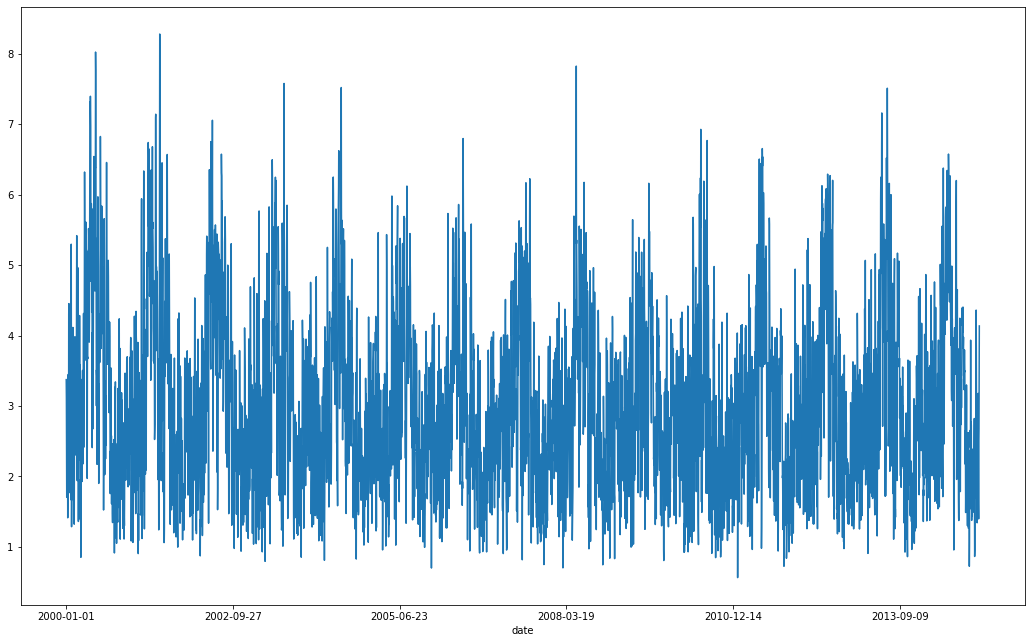

In [ ]:
plt.figure(figsize=(18,11))
r1_2000["Wind Speed"].plot()
#r1_2000["Wind Speed"][:200].plot()

In [ ]:
df=r1_2000

In [ ]:
len(df)

5479

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df["Wind Speed"])

In [ ]:
#Ho : 
#H1 : 
def adfuller_test(windspeed):
    result=adfuller(windspeed)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df["Wind Speed"])

ADF Test Statistic : -6.3795250243283546
p-value : 2.240211241769144e-08
#Lags Used : 31
Number of Observations Used : 5447
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
kpss_test(df["Wind Speed"])

Results of KPSS Test:
Test Statistic            0.328989
p-value                   0.100000
Lags Used                37.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [ ]:
df['Speed First Difference'] = df['Wind Speed'] - df['Wind Speed'].shift(730)

In [ ]:
adfuller_test(df['Speed First Difference'].dropna())

ADF Test Statistic : -10.668675216550255
p-value : 4.222134320252627e-19
#Lags Used : 32
Number of Observations Used : 4716
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
kpss_test(df['Speed First Difference'].dropna())

Results of KPSS Test:
Test Statistic            1.187524
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


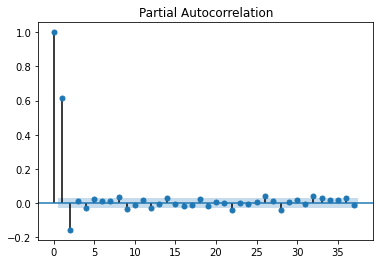

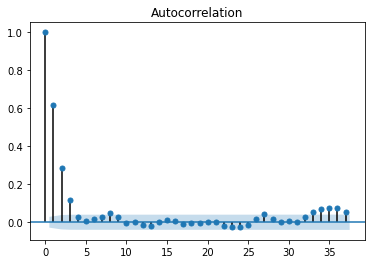

In [ ]:
plot_pacf(df['Speed First Difference'].dropna());
plot_acf(df['Speed First Difference'].dropna());

In [ ]:
X = df["Wind Speed"]
train= X[:len(X)-30]
test = X[len(X)-30:]

In [ ]:
model=AutoReg(df["Wind Speed"], lags=1).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             Wind Speed   No. Observations:                 5479
Model:                     AutoReg(1)   Log Likelihood               -6690.484
Method:               Conditional MLE   S.D. of innovations              0.821
Date:                Fri, 27 Nov 2020   AIC                             -0.394
Time:                        14:23:43   BIC                             -0.390
Sample:                    01-02-2000   HQIC                            -0.393
                         - 12-31-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.7497      0.029     25.797      0.000       0.693       0.807
Wind Speed.L1     0.7510      0.009     84.178      0.000       0.734       0.769
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3315           +0.0000j            1.3315            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
pred = model.predict(start=len(df)-30, end =len(df)-1)

2014-12-02    2.869647
2014-12-03    1.907473
2014-12-04    1.399602
2014-12-05    1.466381
2014-12-06    2.231199
2014-12-07    2.412566
2014-12-08    2.104387
2014-12-09    2.018771
2014-12-10    2.672161
2014-12-11    3.160494
2014-12-12    3.583860
2014-12-13    4.024609
2014-12-14    3.614563
2014-12-15    2.881262
2014-12-16    2.317835
2014-12-17    2.486274
2014-12-18    2.014067
2014-12-19    1.758570
2014-12-20    2.112422
2014-12-21    2.884832
2014-12-22    2.428037
2014-12-23    2.450229
2014-12-24    3.059817
2014-12-25    3.137190
2014-12-26    2.301751
2014-12-27    1.969246
2014-12-28    1.800316
2014-12-29    2.635462
2014-12-30    2.761586
2014-12-31    3.497243
Freq: D, dtype: float64


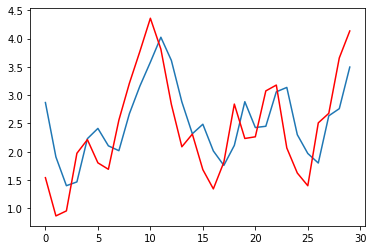

In [ ]:
plt.plot(pred.values)
plt.plot(test.values, color ='red')
print(pred)

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = (mean_squared_error(test, pred))
print(rmse)

0.4273531492724481


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(test, pred)

29.067872698746765

In [ ]:
from statsmodels.tsa.arima_model import ARMA
model2 = ARMA(df["Wind Speed"], order=(1, 3)).fit()
model2.summary()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Wind Speed   No. Observations:                 5479
Model:                     ARMA(1, 3)   Log Likelihood               -6550.122
Method:                       css-mle   S.D. of innovations              0.800
Date:                Fri, 27 Nov 2020   AIC                          13112.244
Time:                        18:01:06   BIC                          13151.896
Sample:                    01-01-2000   HQIC                         13126.077
                         - 12-31-2014                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.0077      0.105     28.523      0.000       2.801       3.214
ar.L1.Wind Speed     0.9775      0.005    214.920      0.000       0.969       0.986
ma.L1.Wind Speed    -0.2284      0.014    -16.030      0.000      -0.256      -0.200
ma.L2.Wind Speed    -0.3708      0.015    -24.516      0.000      -0.400      -0.341
ma.L3.Wind Speed    -0.1794      0.013    -13.342      0.000      -0.206      -0.153
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0231           +0.0000j            1.0231            0.0000
MA.1            1.1355           -0.0000j            1.1355           -0.0000
MA.2           -1.6011           -1.5315j            2.2156           -0.3785
MA.3           -1.6011           +1.5315j            2.2156            0.3785
-----------------------------------------------------------------------------
"""

In [ ]:
pred2 = model2.predict(start=len(df)-30, end =len(df)-1)

In [ ]:
#test

2014-12-02    2.625520
2014-12-03    1.635074
2014-12-04    1.436099
2014-12-05    1.590423
2014-12-06    2.225390
2014-12-07    2.179302
2014-12-08    1.852283
2014-12-09    1.897846
2014-12-10    2.546310
2014-12-11    2.837588
2014-12-12    3.177831
2014-12-13    3.593818
2014-12-14    3.139529
2014-12-15    2.616800
2014-12-16    2.301601
2014-12-17    2.575618
2014-12-18    2.008005
2014-12-19    1.861471
2014-12-20    2.258573
2014-12-21    2.849854
2014-12-22    2.184384
2014-12-23    2.386012
2014-12-24    2.997563
2014-12-25    2.863534
2014-12-26    2.078761
2014-12-27    2.021862
2014-12-28    1.889070
2014-12-29    2.692661
2014-12-30    2.570602
2014-12-31    3.288845
Freq: D, dtype: float64


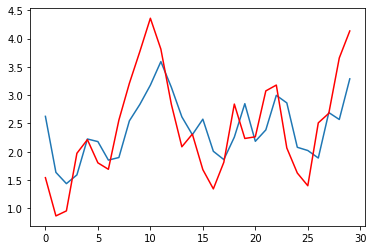

In [ ]:
plt.plot(pred2.values)
plt.plot(test.values, color ='red')
print(pred2)

In [ ]:
rmse = (mean_squared_error(test, pred2))
print(rmse)

0.39594530404466444


In [ ]:
mean_absolute_percentage_error(test, pred2)

25.738618840965245

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


[2.64671037 2.49182347 2.42894583 2.40995649 2.4083286  2.4135112
 2.42130859 2.43005323 2.43908325 2.44813686 2.45711135 2.46596732
 2.47469048 2.48327656 2.49172521 2.50003764 2.50821565 2.51626126
 2.52417654 2.53196359 2.53962447 2.54716122 2.55457586 2.56187035
 2.56904666 2.57610668 2.58305231 2.5898854  2.59660777 2.60322122]
0.9087085879088114


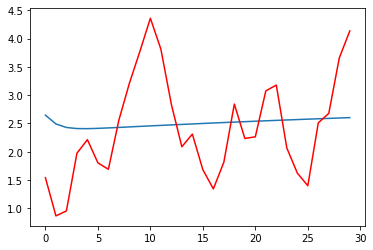

In [ ]:
model3 = ARMA(train, order=(2, 3)).fit()
model3.summary()
pred3 = model3.predict(start=len(train), end =len(X)-1, dynamic= False)
plt.plot(pred3)
plt.plot(test, color ='red')
print(pred3)
rmse = sqrt(mean_squared_error(test, pred3))
print(rmse)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

[2.58066543 2.37166867 2.28264321 2.23861601 2.22181911 2.21181728
 2.20912471 2.20640253 2.20625436 2.20524589 2.2054245  2.20490933
 2.2050397  2.20471352 2.20476456 2.20453088 2.20452354 2.20434158
 2.20429669 2.20414528 2.20407713 2.20394411 2.20386172 2.20373986
 2.2036488  2.20353371 2.20343737 2.20332641 2.20322684 2.20311839]
0.9545938229704999


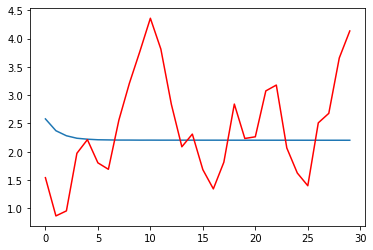

In [ ]:
model4 = ARIMA(train, order=(2, 1, 3)).fit()
model4.summary()
# make prediction
pred4 = model4.predict(start=len(train), end =len(X)-1, typ='levels')
plt.plot(pred4)
plt.plot(test, color ='red')
print(pred4)
rmse = sqrt(mean_squared_error(test, pred4))
print(rmse)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

In [ ]:
model5 = SARIMAX(train, order=(2, 0, 3), seasonal_order=(2, 0, 3, 365)).fit()
model5.summary()
# make prediction
pred5 = model5.predict(start=len(train), end =len(X)-1)
plt.plot(pred5)
plt.plot(test, color ='red')
print(pred5)
rmse = sqrt(mean_squared_error(test, pred5))
print(rmse)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(df["Speed First Difference"].dropna(), trace= True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15432.490, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15414.755, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15397.519, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15430.490, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.78 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14696.683, Time=2.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=8.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=14694.698, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15395.519, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=1.89 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=inf, Time=1.53 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=1.46 sec

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5479
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -6544.925
Date:                Sat, 21 Nov 2020   AIC                          13097.850
Time:                        02:37:27   BIC                          13124.284
Sample:                             0   HQIC                         13107.072
                               - 5479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4435      0.021     21.205      0.000       0.403       0.484
ma.L1         -0.6724      0.022    -31.059      0.000      -0.715      -0.630
ma.L2         -0.2471      0.018    -13.806      0.000      -0.282      -0.212
sigma2         0.6385      0.011     57.715      0.000       0.617       0.660
===================================================================================
Ljung-Box (Q):                       52.68   Jarque-Bera (JB):                79.32
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.16
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""